## Example: Random Walk

### with R

In [18]:
rwalk <- function(N) {
    result <- rep(NA, N)
    for (i in 1:N) {
        steps <- 1
        a <- if (runif(1) >= 0.5) 1 else -1
        while (a != 0) {
            steps <- steps + 1
            a <- a + if (runif(1) >= 0.5) 1 else -1
            if (steps >= 10^6) break
        }
        result[i] <- steps
    }
    result
}

In [23]:
set.seed(9753)
system.time(no_steps_R <- rwalk(10000))

   user  system elapsed 
 29.811   0.003  29.854 

In [24]:

max(no_steps_R); mean(no_steps_R); median(no_steps_R); sum(no_steps_R)

[1] 1e+06

[1] 1557.419

[1] 2

[1] 15574192

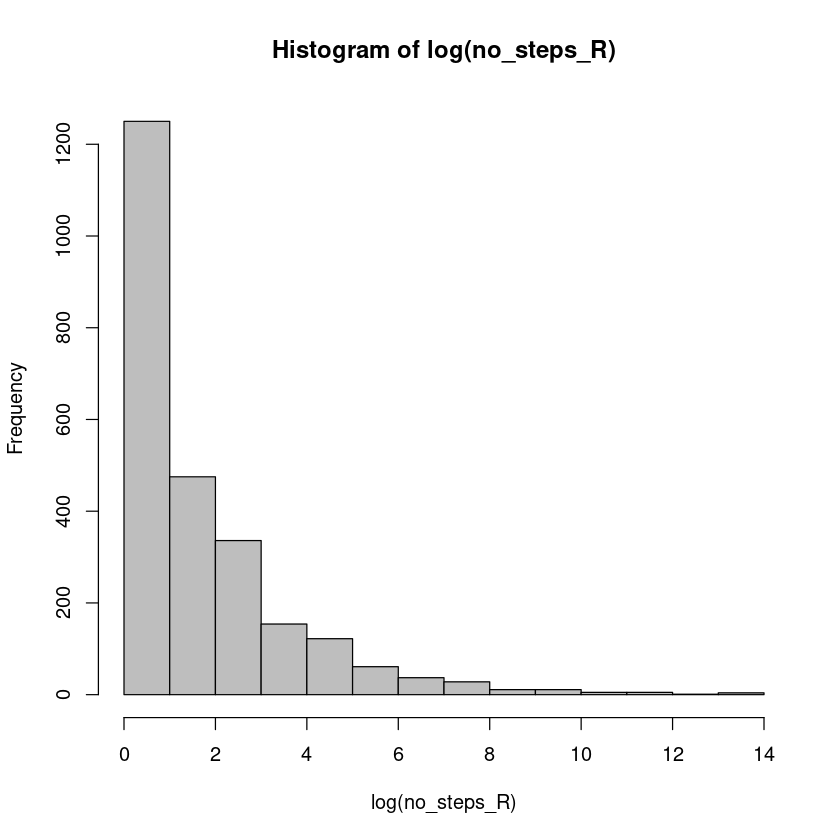

In [21]:
hist(log(no_steps_R), col="gray")

### with JavaScript

In [5]:
library(V8)
js <- v8()

ERROR: Error in library(V8): there is no package called ‘V8’


In [ ]:
js$eval("
function rwalk(N) {                                    //  rwalk = function(N) {
    var result = new Array(N)                          //      result = rep(NA, N)
    var a = 0, steps                                   //      a = 0
    for (var i = 0; i < N; i++) {                      //      for (i in 1:N) {
        steps = 1                                      //          steps = 1
        if (Math.random() >= 0.5) {++a} else {--a}     //          if (runif(1) >= 0.5) {a = a+1} else {a = a-1}
        while (a != 0) {                               //          while (a != 0) {
            steps += 1                                 //              steps = steps + 1
            if (Math.random() >= 0.5) {++a} else {--a} //              if (runif(1) >= 0.5) {a = a+1} else {a = a-1}
        }                                              //          }
        result[i] = steps                              //          result[i] = steps
    }                                                  //      }
    return result                                      //      return(result)
}                                                      //  }
")

In [ ]:
system.time(
js$eval("
var no_steps_JS
no_steps_JS = rwalk(2500)
undefined
")
)

In [ ]:
no_steps_JS <- js$get("no_steps_JS")

In [ ]:
mean(no_steps_JS); median(no_steps_JS); sum(no_steps_JS)

In [ ]:
hist(log(no_steps_JS), col="grey")

In [ ]:
r_R  <- rle(sort(no_steps_R))
r_JS <- rle(sort(no_steps_JS))
r_JS

In [ ]:
x_R  <- c(1, r_R$values)
x_JS <- c(1, r_JS$values)
w_R  <- c(0, cumsum(r_R$lengths)/sum(r_R$length))
w_JS <- c(0, cumsum(r_JS$lengths)/sum(r_JS$length))

plot(c(0, 400), c(0,1), type='n'); grid()
lines(x_R[1:100], w_R[1:100], col="blue")
lines(x_JS[1:150], w_JS[1:150], col="red")
abline(h = 0.95, col="gray")

In [ ]:
i_R <- which(w_R >= 0.95)[1]
i1 = i_R - 1; i2 = i_R
w1 = w_R[i1]; w2 = w_R[i2]
x_R[round(i1 + w1/w2*(0.95 - w1))]

i_JS <- which(w_JS >= 0.95)[1]
i1 = i_JS - 1; i2 = i_JS
w1 = w_JS[i1]; w2 = w_JS[i2]
x_JS[round(i1 + w1/w2*(0.95 - w1))]

### Theory

The probability for returning to 0 for the first time after $n$ steps is:
$$
    P(W = 2n) = {2(n-1) \choose n-1} \frac{1}{2^{2(n-1)}} \frac{1}{2n}
$$

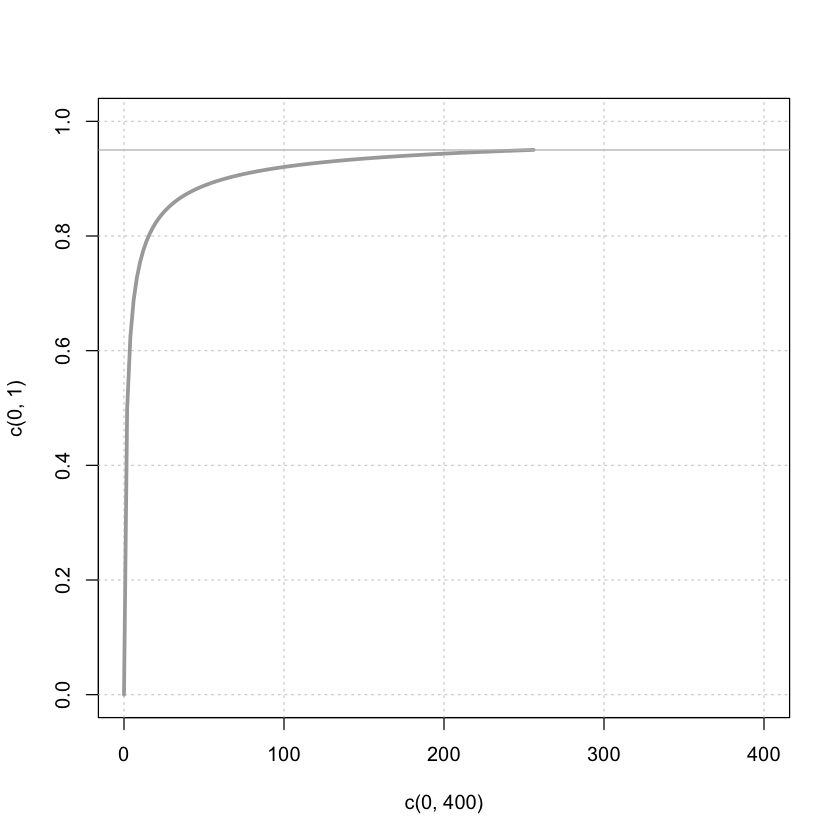

In [1]:
n = 1:128
a = choose(2*(n-1), n-1)/2^(2*(n-1))/(2*n)
x = c(0, 2*n)
w = c(0, cumsum(a))

plot(c(0, 400), c(0,1), type='n'); grid()
lines(x, w, col="darkgray", lwd=3)
# lines(x_JS[1:150], w_JS[1:150], col="red")
abline(h = 0.95, col="gray")

In [17]:
require(gmp)
n2 <- as.bigz(2)
s <- 0.0
for (m in 1:510) {
    n <- as.bigz(m)
    a <- chooseZ(n2*(n-1), n-1) / (n2^(n2*(n-1)) * n2 * n)
    s <- s + as.numeric(a)
}
s

[1] 0.9750234

So theoretically there are 1020 steps to have a 97.5 percent chance of returning.